## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [245]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

In [246]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [247]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]


## OneR Classifier

In [248]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [249]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [250]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## KNN Classifier

In [251]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [252]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [253]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
204,1.0,1.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [254]:
# !pip install scikit-plot


In [255]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.5502392344497608


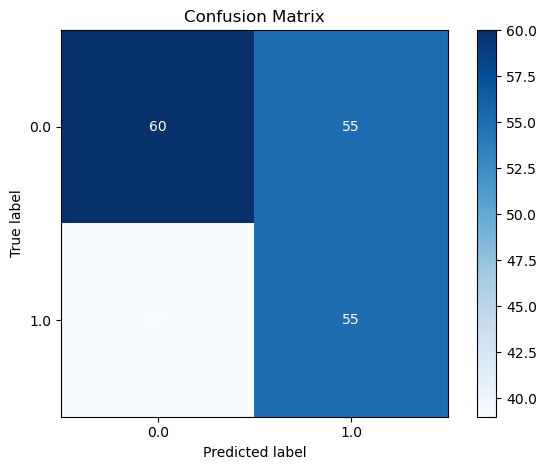

In [256]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN q3')

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56       115
         1.0       0.50      0.59      0.54        94

    accuracy                           0.55       209
   macro avg       0.55      0.55      0.55       209
weighted avg       0.56      0.55      0.55       209



## Decision Tree

In [258]:
from matplotlib import pyplot as plt
from sklearn import tree

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.713


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

fig.savefig("decistion_tree.png")


In [260]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.556 , Test Acc. =  0.493
Max Depth =  2 , Train Acc. =  0.579 , Test Acc. =  0.522
Max Depth =  3 , Train Acc. =  0.591 , Test Acc. =  0.541
Max Depth =  4 , Train Acc. =  0.636 , Test Acc. =  0.612
Max Depth =  5 , Train Acc. =  0.659 , Test Acc. =  0.584
Max Depth =  6 , Train Acc. =  0.67 , Test Acc. =  0.589
Max Depth =  7 , Train Acc. =  0.711 , Test Acc. =  0.598
Max Depth =  8 , Train Acc. =  0.743 , Test Acc. =  0.641
Max Depth =  9 , Train Acc. =  0.77 , Test Acc. =  0.646
Max Depth =  10 , Train Acc. =  0.812 , Test Acc. =  0.67
Max Depth =  11 , Train Acc. =  0.841 , Test Acc. =  0.708
Max Depth =  12 , Train Acc. =  0.856 , Test Acc. =  0.727
Max Depth =  13 , Train Acc. =  0.867 , Test Acc. =  0.727
Max Depth =  14 , Train Acc. =  0.883 , Test Acc. =  0.737
Max Depth =  15 , Train Acc. =  0.892 , Test Acc. =  0.722
Max Depth =  16 , Train Acc. =  0.898 , Test Acc. =  0.708
Max Depth =  17 , Train Acc. =  0.898 , Test Acc. =  0.703
Max Depth

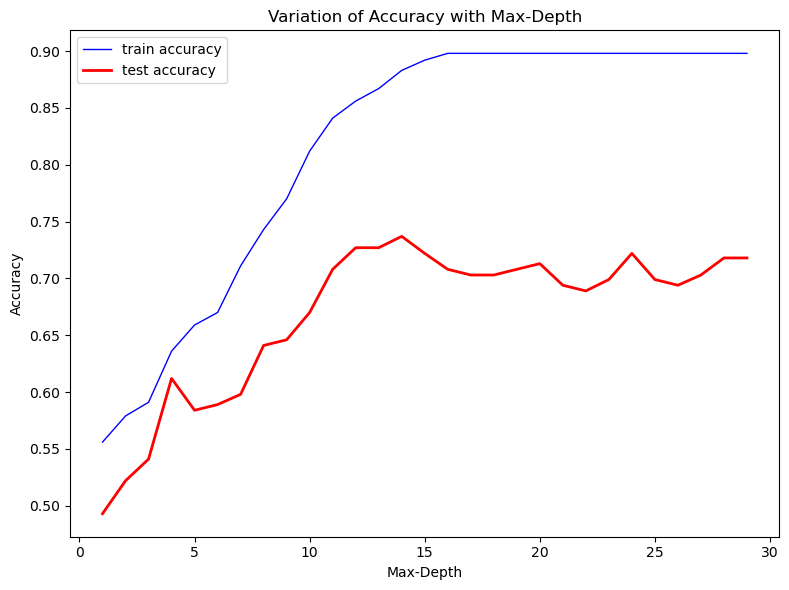

In [261]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [262]:
# Confusion matrix for train set
pd. DataFrame (confusion_matrix(y_train, dt.predict(X_train)))

,0,1
0,433,25
1,68,390


In [263]:
# Confusion matrix for test set
pd. DataFrame (confusion_matrix(y_test, dt.predict(X_test)))

,0,1
0,88,27
1,33,61


In [264]:
print(classification_report (y_train, dt.predict(X_train).round (3)))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       458
         1.0       0.94      0.85      0.89       458

    accuracy                           0.90       916
   macro avg       0.90      0.90      0.90       916
weighted avg       0.90      0.90      0.90       916



In [265]:
print(classification_report(y_test, dt.predict (X_test). round(3)))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       115
         1.0       0.69      0.65      0.67        94

    accuracy                           0.71       209
   macro avg       0.71      0.71      0.71       209
weighted avg       0.71      0.71      0.71       209



## Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[86 29]
 [34 60]]
0.6985645933014354
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73       115
         1.0       0.67      0.64      0.66        94

    accuracy                           0.70       209
   macro avg       0.70      0.69      0.69       209
weighted avg       0.70      0.70      0.70       209



## Reshaping (Not Necessary)

 y_train.values.reshape(-1, 1)

In [296]:
X_train.values

array([[1.        , 0.        , 0.        , ..., 1.        , 0.75      ,
        0.75      ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.5       ,
        0.75      ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.6155116 ,
        0.5577558 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.79040156,
        0.95959844],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.85284598]])

## Hyperparameter Tuning on KNN

In [299]:
from sklearn.model_selection import GridSearchCV


In [300]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [302]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [303]:
best_grid = grid_search_knn.best_estimator_

In [304]:
best_grid

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [305]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[88 27]
 [31 63]]
Accuracy Score 0.722488038277512
Classification report:               precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       115
         1.0       0.70      0.67      0.68        94

    accuracy                           0.72       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.72      0.72      0.72       209

